In [2]:
#Employee Salary prediction using adult.csv
#import your libraries
import pandas as pd

In [3]:
data= pd.read_csv(r"C:\Users\adira\Downloads\updated_employee_salary_dataset.csv")

In [4]:
data

,education_level,experience,location,job_title,age,gender,salary
0,High School,29,Urban,Data Analyst,34,Male,117600
1,PhD,3,Suburban,Data Analyst,46,Male,81937
2,Bachelor's,6,Rural,HR Manager,44,Female,60775
3,Master's,12,Rural,HR Manager,49,Male,82280
4,Bachelor's,1,Rural,Clerk,59,Female,17850
...,...,...,...,...,...,...,...
29995,High School,11,Rural,Director,58,Male,126480
29996,Bachelor's,29,Urban,Data Analyst,44,Female,147000
29997,PhD,18,Suburban,Technician,56,Female,67687
29998,Bachelor's,2,Urban,Technician,52,Female,33000


In [5]:
data.isna().sum()

education_level    0
experience         0
location           0
job_title          0
age                0
gender             0
salary             0
dtype: int64

In [6]:
print(data.salary.value_counts())

salary
125400    83
133000    74
114000    74
56100     72
51000     71
          ..
224675     1
61880      1
286875     1
57997      1
73437      1
Name: count, Length: 2120, dtype: int64


In [7]:
data.dtypes


education_level    object
experience          int64
location           object
job_title          object
age                 int64
gender             object
salary              int64
dtype: object

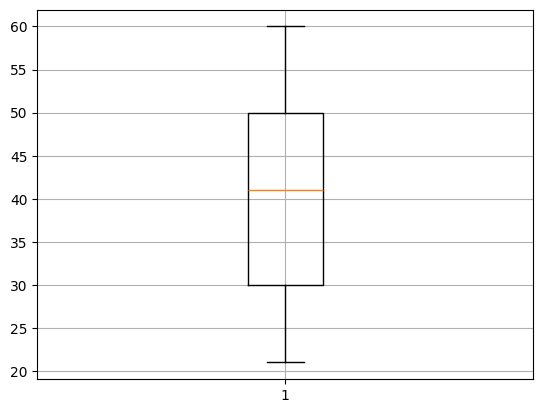

In [8]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.grid()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
categorical_cols = ['education_level', 'location', 'job_title', 'gender']

for col in categorical_cols:
    le = LabelEncoder()
    if data[col].dtype == 'object' or str(data[col].dtype).startswith('category'):
        data[col] = le.fit_transform(data[col].astype(str))  # Ensures all values are strings
        encoders[col] = le

In [10]:
data.dtypes

education_level    int64
experience         int64
location           int64
job_title          int64
age                int64
gender             int64
salary             int64
dtype: object

In [11]:
for col, le in encoders.items():
    print(f"Encoding for '{col}':")
    mapping = {class_: int(code) for class_, code in zip(le.classes_, le.transform(le.classes_))}
    print(mapping)
    print()

Encoding for 'education_level':
{"Bachelor's": 0, 'High School': 1, "Master's": 2, 'PhD': 3}

Encoding for 'location':
{'Rural': 0, 'Suburban': 1, 'Urban': 2}

Encoding for 'job_title':
{'Clerk': 0, 'Customer Support': 1, 'Data Analyst': 2, 'Data Scientist': 3, 'Director': 4, 'HR Manager': 5, 'Marketing Executive': 6, 'Product Manager': 7, 'Software Engineer': 8, 'Technician': 9}

Encoding for 'gender':
{'Female': 0, 'Male': 1}



In [12]:
# 2. Split features (X) and target (y)
X = data.drop('salary', axis=1)
y = data['salary']

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 4. Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [17]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R²': r2}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("📊 Model Comparison:")
print(results_df)

📊 Model Comparison:
                            MSE           MAE        R²
Linear Regression  3.006686e+09  44019.442414  0.221366
Random Forest      6.739145e+04    102.261613  0.999983
SVR                4.044984e+09  48443.893394 -0.047519
XGBoost            9.966827e+05    694.077820  0.999742


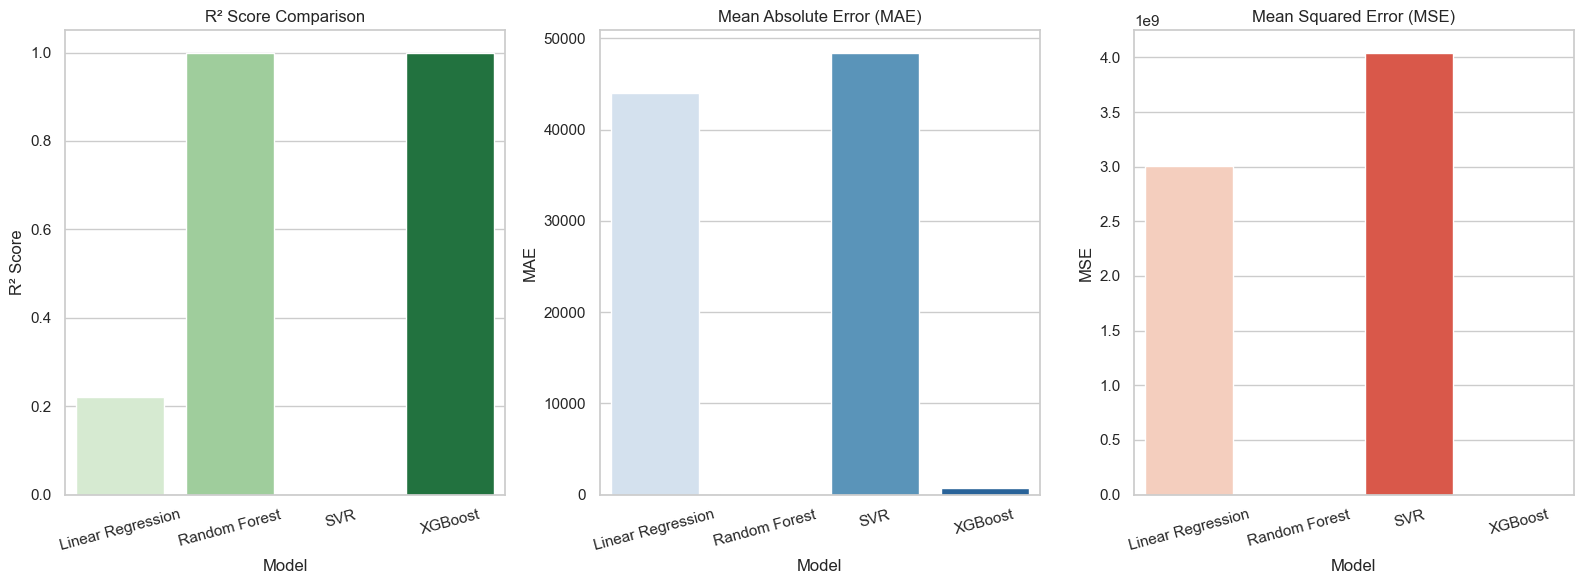

In [18]:
import seaborn as sns

results_df['Model'] = ['Linear Regression', 'Random Forest', 'SVR', 'XGBoost']

# Set the seaborn style
sns.set(style='whitegrid')

# Set up the figure
plt.figure(figsize=(16, 6))

# 1️⃣ R² Score Plot
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R²', data=results_df, palette='Greens',hue='Model',legend=False)
plt.title('R² Score Comparison')
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.ylabel('R² Score')

# 2️⃣ MAE Plot
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df, palette='Blues',hue='Model',legend=False)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=15)
plt.ylabel('MAE')

# 3️⃣ MSE Plot
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MSE', data=results_df, palette='Reds',hue='Model',legend=False)
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=15)
plt.ylabel('MSE')

# Layout adjustment
plt.tight_layout()
plt.show()


In [20]:
# Train the RandomForest model

from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train.values.ravel())

# Predict and evaluate
y_pred = rfr_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("📈 Final RandomForestRegressor Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ₹{mae:,.2f}")
print(f"MSE: ₹{mse:,.2f}")

📈 Final RandomForestRegressor Model Performance:
R² Score: 1.0000
MAE: ₹102.26
MSE: ₹67,391.45


C:\Users\adira\AppData\Local\Temp\ipykernel_24532\4171209752.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='crest')


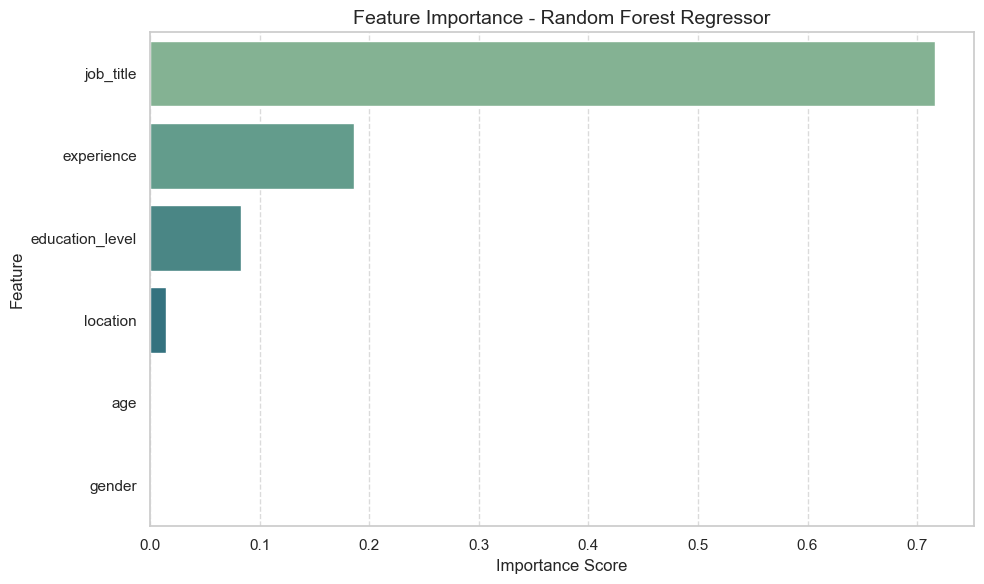

In [21]:
# Get feature importances
importances = rfr_model.feature_importances_
feature_names = X.columns

# Create DataFrame for feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='crest')
plt.title("Feature Importance - Random Forest Regressor", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
import joblib

# Save the model with compression (optional)
joblib.dump(rfr_model, 'rf_model_compressed.pkl', compress=3)


['rf_model_compressed.pkl']